In [1]:
# Author: Roi Yehoshua <roiyeho@gmail.com>
# August 2024
# License: MIT

In [2]:
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(42)

In [3]:
from sklearn.datasets import fetch_openml

X, y = fetch_openml(name='diabetes', version=1, as_frame=False, return_X_y=True)

# Convert the target to integers 
y = (y == 'tested_positive').astype(int)  # 0 = negative, 1 = positive

In [4]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [5]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [6]:
from sklearn.neural_network import MLPClassifier

clf = MLPClassifier(random_state=42)
clf.fit(X_train, y_train)

C:\Users\roi_y\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


MLPClassifier(random_state=42)

In [7]:
print(f'Train accuracy: {clf.score(X_train, y_train):.4f}')
print(f'Test accuracy: {clf.score(X_test, y_test):.4f}')

Train accuracy: 0.8316
Test accuracy: 0.7135


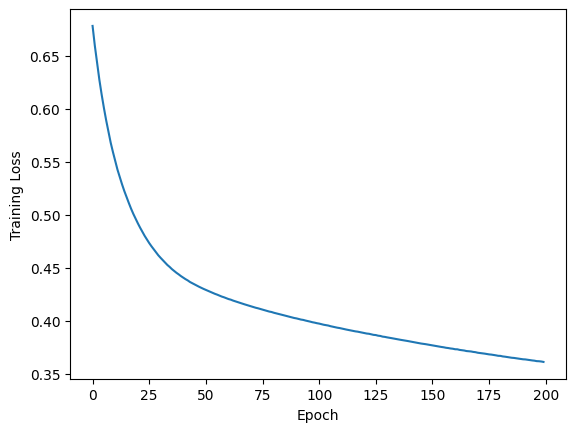

In [8]:
plt.plot(clf.loss_curve_)
plt.xlabel('Epoch')
plt.ylabel('Training Loss')
plt.savefig('figures/mlp_learning_curve.pdf')

In [9]:
clf = MLPClassifier(hidden_layer_sizes=[10], activation='logistic', solver='sgd', alpha=0, 
                    learning_rate_init=0.1, momentum=0.0, max_iter=200, batch_size=32, 
                    early_stopping=False, n_iter_no_change=200, random_state=42)
clf.fit(X_train, y_train)

print(f'Train accuracy: {clf.score(X_train, y_train):.4f}')
print(f'Test accuracy: {clf.score(X_test, y_test):.4f}')

Train accuracy: 0.7865
Test accuracy: 0.7448


C:\Users\roi_y\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


In [10]:
# Changing random seed
clf = MLPClassifier(hidden_layer_sizes=[10], activation='logistic', solver='sgd', alpha=0, 
                    learning_rate_init=0.1, momentum=0.0, max_iter=200, batch_size=32, 
                    n_iter_no_change=200, random_state=0)
clf.fit(X_train, y_train)

print(f'Train accuracy: {clf.score(X_train, y_train):.4f}')
print(f'Test accuracy: {clf.score(X_test, y_test):.4f}')

Train accuracy: 0.7847
Test accuracy: 0.7396


C:\Users\roi_y\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
